In [1]:
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate as integrate

In [2]:
%matplotlib inline

The conserved quantity is referenced from:

http://pages.physics.cornell.edu/~sethna/teaching/sss/jupiter/Web/Rest3Bdy.htm

In [3]:
def primary_mass(t):
    pos1 = np.array([np.cos(t),np.sin(t)])
    pos2 = np.array([-np.cos(t),-np.sin(t)])
    return pos1, pos2

In [4]:
def PCR3PB(state,time):
    m1         = 0.5
    m2         = 0.5
    pos        = np.array([state[0],state[1]])
    vel        = np.array([state[2],state[3]])
    pos1, pos2 = primary_mass(time)
    r1         = pos1-pos
    r2         = pos2-pos
    r1_mag     = np.sqrt(r1.dot(r1))
    r2_mag     = np.sqrt(r2.dot(r2))
    force      = m1*r1/r1_mag**3 + m2*r2/r2_mag**3
    dstate     = np.hstack((vel,force))
    return dstate

In [5]:
def energy_and_Jacobi(state,time):
    m1         = 0.5
    m2         = 0.5
    pos        = np.array([state[0],state[1]])
    vel        = np.array([state[2],state[3]])
    pos1, pos2 = primary_mass(time)
    r1         = pos1-pos
    r2         = pos2-pos
    r1_mag     = np.sqrt(r1.dot(r1))
    r2_mag     = np.sqrt(r2.dot(r2))
    U          = -m1/r1_mag - m2/r2_mag
    K          = 0.5*vel.dot(vel)
    U_rot      = 0.5*pos.dot(pos) - U 
    J          = K + U + (vel[0]*pos[1]- vel[1]*pos[0])
    return np.array([K+U,J])

In [6]:
time = np.arange(0,200,0.01)

In [7]:
s0   = np.array([0,0.1,0,0.1])

In [8]:
eph  = integrate.odeint(PCR3PB,s0,time)

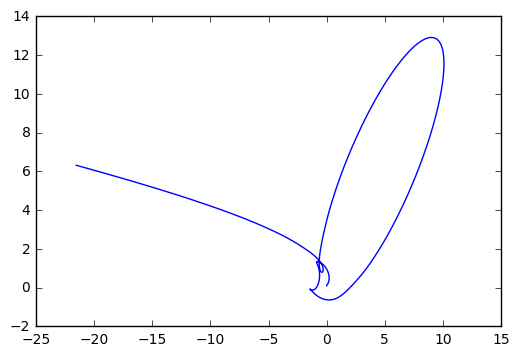

In [9]:
plt.plot(eph[:,0],eph[:,1])

In [10]:
E_and_J = np.zeros((len(eph),2))
for i in range(len(eph)):
    E_and_J[i,:]   = energy_and_Jacobi(eph[i,:],time[i])

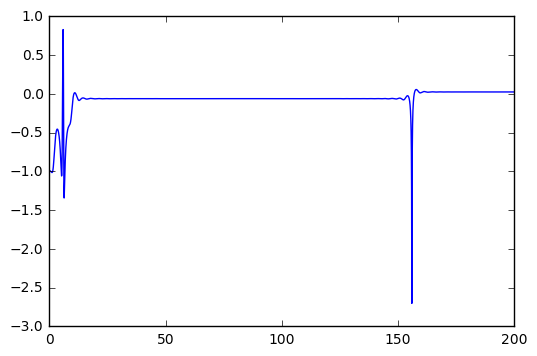

In [11]:
plt.plot(time,E_and_J[:,0])

(-0.995, -0.985)

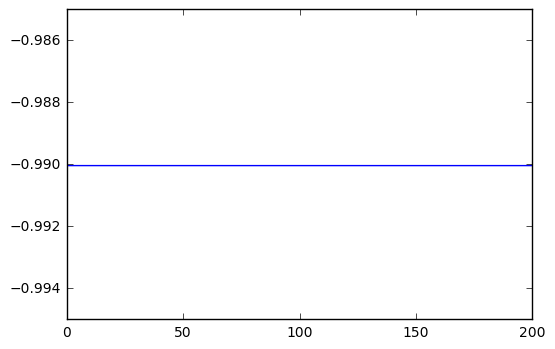

In [12]:
plt.plot(time,E_and_J[:,1])
plt.ylim([-0.995,-0.985])

In [14]:
print np.min(E_and_J[:,1]), np.max(E_and_J[:,1]), np.mean(E_and_J[:,1])

-0.990038082375 -0.990036880151 -0.990037351825
